In [1]:
import sqlite3
import pandas as pd
import os
import sys

In [2]:
# Determine the database path dynamically
# We check if we are running from the Project Root or the Notebook Folder

current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

possible_paths = [
    os.path.join('prisma', 'dev.db'),           # If running from root
    os.path.join('..', 'prisma', 'dev.db'),     # If running from Explore_Data
    os.path.join(current_dir, 'prisma', 'dev.db'), # Absolute from root
    os.path.join(os.path.dirname(current_dir), 'prisma', 'dev.db') # Absolute from folder
]

db_path = None
for path in possible_paths:
    if os.path.exists(path):
        db_path = path
        break

if db_path:
    print(f"Found database at: {os.path.abspath(db_path)}")
else:
    print("Could not find database file in expected locations!")
    # List files to help debug
    print("Files in current directory:", os.listdir())

Current working directory: C:\Users\yoel\constructor\Explore_Data
Found database at: C:\Users\yoel\constructor\prisma\dev.db


In [3]:
if db_path:
    try:
        conn = sqlite3.connect(db_path)
        print("Successfully connected to database")
    except Exception as e:
        print(f"Error connecting to database: {e}")
else:
    print("Cannot connect: No database path found")

Successfully connected to database


In [4]:
if db_path:
    # List all tables in the database
    query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
    try:
        tables = pd.read_sql_query(query_tables, conn)
        print("Tables found:")
        display(tables)
    except Exception as e:
        print(f"Error reading tables: {e}")

Tables found:


,name
0,Project
1,Report
2,Apartment
3,WorkItem
4,Inspection
5,Snapshot


In [5]:
# Read the 'Project' table
if 'conn' in locals():
    query = "SELECT * FROM Project"
    try:
        df_project = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_project)} projects")
        display(df_project)
    except Exception as e:
        print(f"Error reading Project table: {e}")

Loaded 1 projects


,id,name,address,createdAt,updatedAt
0,cmkpa097s000010kkxbekjagl,מוסינזון 5 תל אביב,"מוסינזון 5, תל אביב",1769075719337,1769075719337


In [6]:
# Read the 'Report' table
if 'conn' in locals():
    query = "SELECT * FROM Report"
    try:
        df_reports = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_reports)} reports")
        display(df_reports.head())
    except Exception as e:
        print(f"Error reading Report table: {e}")

Loaded 49 reports


,id,projectId,reportDate,fileName,filePath,inspector,rawExtraction,processed,createdAt,updatedAt,fileHash
0,cmkpa15bn000i10kkv03n6luk,cmkpa097s000010kkxbekjagl,1730592000000,2024-11-03 - מוסינזון 5 תל אביב.pdf,C:\Users\yoel\constructor\data\pdfs\2024-11-03...,אינג' אילן שימונוב,"{""reportDate"":""2024-11-03"",""inspector"":""אינג' ...",1,1769075760947,1769075763743,NaN
1,cmkpa2hrw001q10kk4ejbepii,cmkpa097s000010kkxbekjagl,1732665600000,2024-11-25 - מוסינזון 5 תל אביב.pdf,C:\Users\yoel\constructor\data\pdfs\2024-11-25...,אינג' אילן שימונוב,"{""reportDate"":""2024-11-27"",""inspector"":""אינג' ...",1,1769075823740,1769111992605,NaN
2,cmkpa3cg5002q10kkggwivzzm,cmkpa097s000010kkxbekjagl,1733356800000,2024-12-05 - מוסינזון 5 תל אביב.pdf,C:\Users\yoel\constructor\data\pdfs\2024-12-05...,אינג' אילן שימונוב,"{""reportDate"":""2024-12-05"",""inspector"":""אינג' ...",1,1769075863493,1769075866352,NaN
3,cmkpa529j000p5sxqmqp5t232,cmkpa097s000010kkxbekjagl,1734480000000,2024-12-18 - מוסינזון 5 תל אביב.pdf,C:\Users\yoel\constructor\data\pdfs\2024-12-18...,אינג' אילן שימונוב,"{""reportDate"":""2024-12-18"",""inspector"":""אינג' ...",1,1769075943608,1769075949112,NaN
4,cmkpa6huy002f5sxqs687w3zm,cmkpa097s000010kkxbekjagl,1735776000000,2025-01-02 - מוסינזון 5 תל אביב.pdf,C:\Users\yoel\constructor\data\pdfs\2025-01-02...,אינג' אילן שימונוב,"{""reportDate"":""2025-01-02"",""inspector"":""אינג' ...",1,1769076010474,1769076047515,NaN


In [7]:
# Read the 'Apartment' table
if 'conn' in locals():
    query = "SELECT * FROM Apartment"
    try:
        df_apartments = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_apartments)} apartments")
        display(df_apartments.head())
    except Exception as e:
        print(f"Error reading Apartment table: {e}")

Loaded 8 apartments


,id,projectId,number,floor,createdAt,updatedAt
0,cmkpa0989000210kkc3grgsr1,cmkpa097s000010kkxbekjagl,1,None,1769075719354,1769075719354
1,cmkpa098l000410kkfz0mnasu,cmkpa097s000010kkxbekjagl,3,None,1769075719365,1769075719365
2,cmkpa098w000610kku2m38bic,cmkpa097s000010kkxbekjagl,5,None,1769075719376,1769075719376
3,cmkpa0995000810kkei11mqlg,cmkpa097s000010kkxbekjagl,6,None,1769075719385,1769075719385
4,cmkpa099g000a10kkf2am83ne,cmkpa097s000010kkxbekjagl,7,None,1769075719396,1769075719396


In [8]:
# Read the 'WorkItem' table
if 'conn' in locals():
    query = "SELECT * FROM WorkItem"
    try:
        df_work_items = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_work_items)} work items")
        display(df_work_items.head())
    except Exception as e:
        print(f"Error reading WorkItem table: {e}")

Loaded 701 work items


,id,reportId,apartmentId,category,location,description,status,notes,hasPhoto,photoNotes,createdAt,updatedAt
0,cmkpa15d1000k10kksxzqpjp8,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,FLOORING,חדר רחצה,יש להשלים חיפוי עד גובה תקרה,DEFECT,NaN,1,None,1769075760997,1769105172961
1,cmkpa15dd000m10kkgh0x6i5e,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,PLUMBING,רחצה הורים,יש לבצע הגבהה של הניקוז,DEFECT,NaN,1,None,1769075761009,1769105172968
2,cmkpa15dm000o10kkbcx6hfnv,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,SPRINKLERS,סלון,יש לבצע קיצור של הספרינקלר ולהכניס לתוך ההנמכה...,DEFECT,NaN,1,None,1769075761018,1769105172973
3,cmkpa15dw000q10kkddoqs42j,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,ELECTRICAL,סלון,יש לבצע הזזת פתח ביקורת של ארגז התריס למטה,DEFECT,NaN,1,None,1769075761028,1769075761028
4,cmkpa15e3000s10kki5q433qw,cmkpa15bn000i10kkv03n6luk,cmkpa098l000410kkfz0mnasu,PLUMBING,מטבח,"יש להעתיק את נקודת המים למרחק 65 ס""מ מהקיר",DEFECT,NaN,1,None,1769075761035,1769075761035


In [9]:
# Read the 'Inspection' table
if 'conn' in locals():
    query = "SELECT * FROM Inspection"
    try:
        df_inspections = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_inspections)} inspections")
        display(df_inspections.head())
    except Exception as e:
        print(f"Error reading Inspection table: {e}")

Loaded 352 inspections


,id,reportId,apartmentId,category,inspectionDate,status,createdAt,updatedAt
0,cmkpa56bd003b13u5josm17dm,cmkpa529j000p5sxqmqp5t232,cmkpa098l000410kkfz0mnasu,GENERAL,1734480000000,NaN,1769075948857,1769075948857
1,cmkpa56dd003t13u52wpuasxs,cmkpa529j000p5sxqmqp5t232,cmkpa098w000610kku2m38bic,GENERAL,1734480000000,NaN,1769075948929,1769075948929
2,cmkpa56ey004913u5ao5qo5b0,cmkpa529j000p5sxqmqp5t232,cmkpa0995000810kkei11mqlg,GENERAL,1734480000000,NaN,1769075948987,1769075948987
3,cmkpa56gy004p13u5zzhbl2mw,cmkpa529j000p5sxqmqp5t232,cmkpa099g000a10kkf2am83ne,GENERAL,1734480000000,NaN,1769075949059,1769075949059
4,cmkpa56hu004v13u51dlsvlwe,cmkpa529j000p5sxqmqp5t232,cmkpa099p000c10kks4dpl25z,GENERAL,1734480000000,NaN,1769075949090,1769075949090


In [10]:
# Read the 'Snapshot' table
if 'conn' in locals():
    query = "SELECT * FROM Snapshot"
    try:
        df_snapshots = pd.read_sql_query(query, conn)
        print(f"Loaded {len(df_snapshots)} snapshots")
        display(df_snapshots.head())
    except Exception as e:
        print(f"Error reading Snapshot table: {e}")

Loaded 2 snapshots


,id,reason,data,reportCount,createdAt,restoredAt
0,cml6p27q10000zfjkak99rykm,pre-upload: 2026-01-28 - מוסינזון 5 תל אביב.pdf,"{""reports"":[{""id"":""cmkpbpf2b0089srw6isbia46g"",...",47,1770128929945,None
1,cml6p97ed000hzfjkcg23lktu,pre-upload: 2026-01-28 - מוסינזון 5 תל אביב.pdf,"{""reports"":[{""id"":""cmkpbpf2b0089srw6isbia46g"",...",47,1770129256118,None


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.family'] = 'DejaVu Sans' # Detailed Hebrew support might require specific font configuration

In [12]:
# 1. Data Extraction
if 'conn' in locals():
    query = """
    SELECT 
        r.reportDate,
        a.number as apartment_number,
        wi.category,
        wi.status
    FROM WorkItem wi
    JOIN Report r ON wi.reportId = r.id
    JOIN Apartment a ON wi.apartmentId = a.id
    WHERE wi.apartmentId IS NOT NULL
    ORDER BY r.reportDate ASC
    """
    
    try:
        df_progress = pd.read_sql_query(query, conn)
        # Convert reportDate from timestamp (ms) to datetime
        df_progress['reportDate'] = pd.to_datetime(df_progress['reportDate'], unit='ms')
        
        print(f"Loaded {len(df_progress)} work items for analysis")
        display(df_progress.head())
        
        # Check unique statuses to define 'Completed'
        print("Unique Data Statuses:", df_progress['status'].unique())
    except Exception as e:
        print(f"Error extracting data: {e}")

Loaded 528 work items for analysis


,reportDate,apartment_number,category,status
0,2024-11-03,3,FLOORING,DEFECT
1,2024-11-03,3,PLUMBING,DEFECT
2,2024-11-03,3,SPRINKLERS,DEFECT
3,2024-11-03,3,ELECTRICAL,DEFECT
4,2024-11-03,3,PLUMBING,DEFECT


Unique Data Statuses: <StringArray>
['DEFECT', 'IN_PROGRESS', 'COMPLETED', 'COMPLETED_OK', 'NOT_OK']
Length: 5, dtype: str


In [13]:
# 2. Data Processing
if 'df_progress' in locals():
    # Define what counts as "Complete" (Positive progress)
    # Adjust this list based on the actual statuses found above
    COMPLETED_STATUSES = ['COMPLETED', 'DONE', 'OK', 'בוצע', 'תקין', 'בוצע - תקין'] 
    
    # Create a binary 'is_completed' column
    # Note: 'status' in DB might be English Enum or Hebrew text. 
    # Let's assume standard ones or add logic to check containment.
    def is_done(status):
        if not isinstance(status, str):
            return 0
        return 1 if status in COMPLETED_STATUSES or 'COMPLETED' in status.upper() or 'DONE' in status.upper() else 0

    df_progress['is_completed'] = df_progress['status'].apply(is_done)
    
    # Group by Apartment, Category, Date
    # We want Cumulative Sum over time.
    
    # First, pivot or group to get counts per day
    df_grouped = df_progress.groupby(['apartment_number', 'category', 'reportDate'])['is_completed'].sum().reset_index()
    
    # Sort properly
    df_grouped.sort_values(['apartment_number', 'category', 'reportDate'], inplace=True)
    
    # Calculate Cumulative Sum per Group
    df_grouped['cumulative_completed'] = df_grouped.groupby(['apartment_number', 'category'])['is_completed'].transform(pd.Series.cumsum)
    
    display(df_grouped.head())

,apartment_number,category,reportDate,is_completed,cumulative_completed
0,1,DRYWALL,2025-07-28,1,1
1,1,ELECTRICAL,2025-07-28,0,0
2,1,ELECTRICAL,2025-08-18,0,0
3,1,ELECTRICAL,2025-09-04,0,0
4,1,ELECTRICAL,2025-09-17,0,0


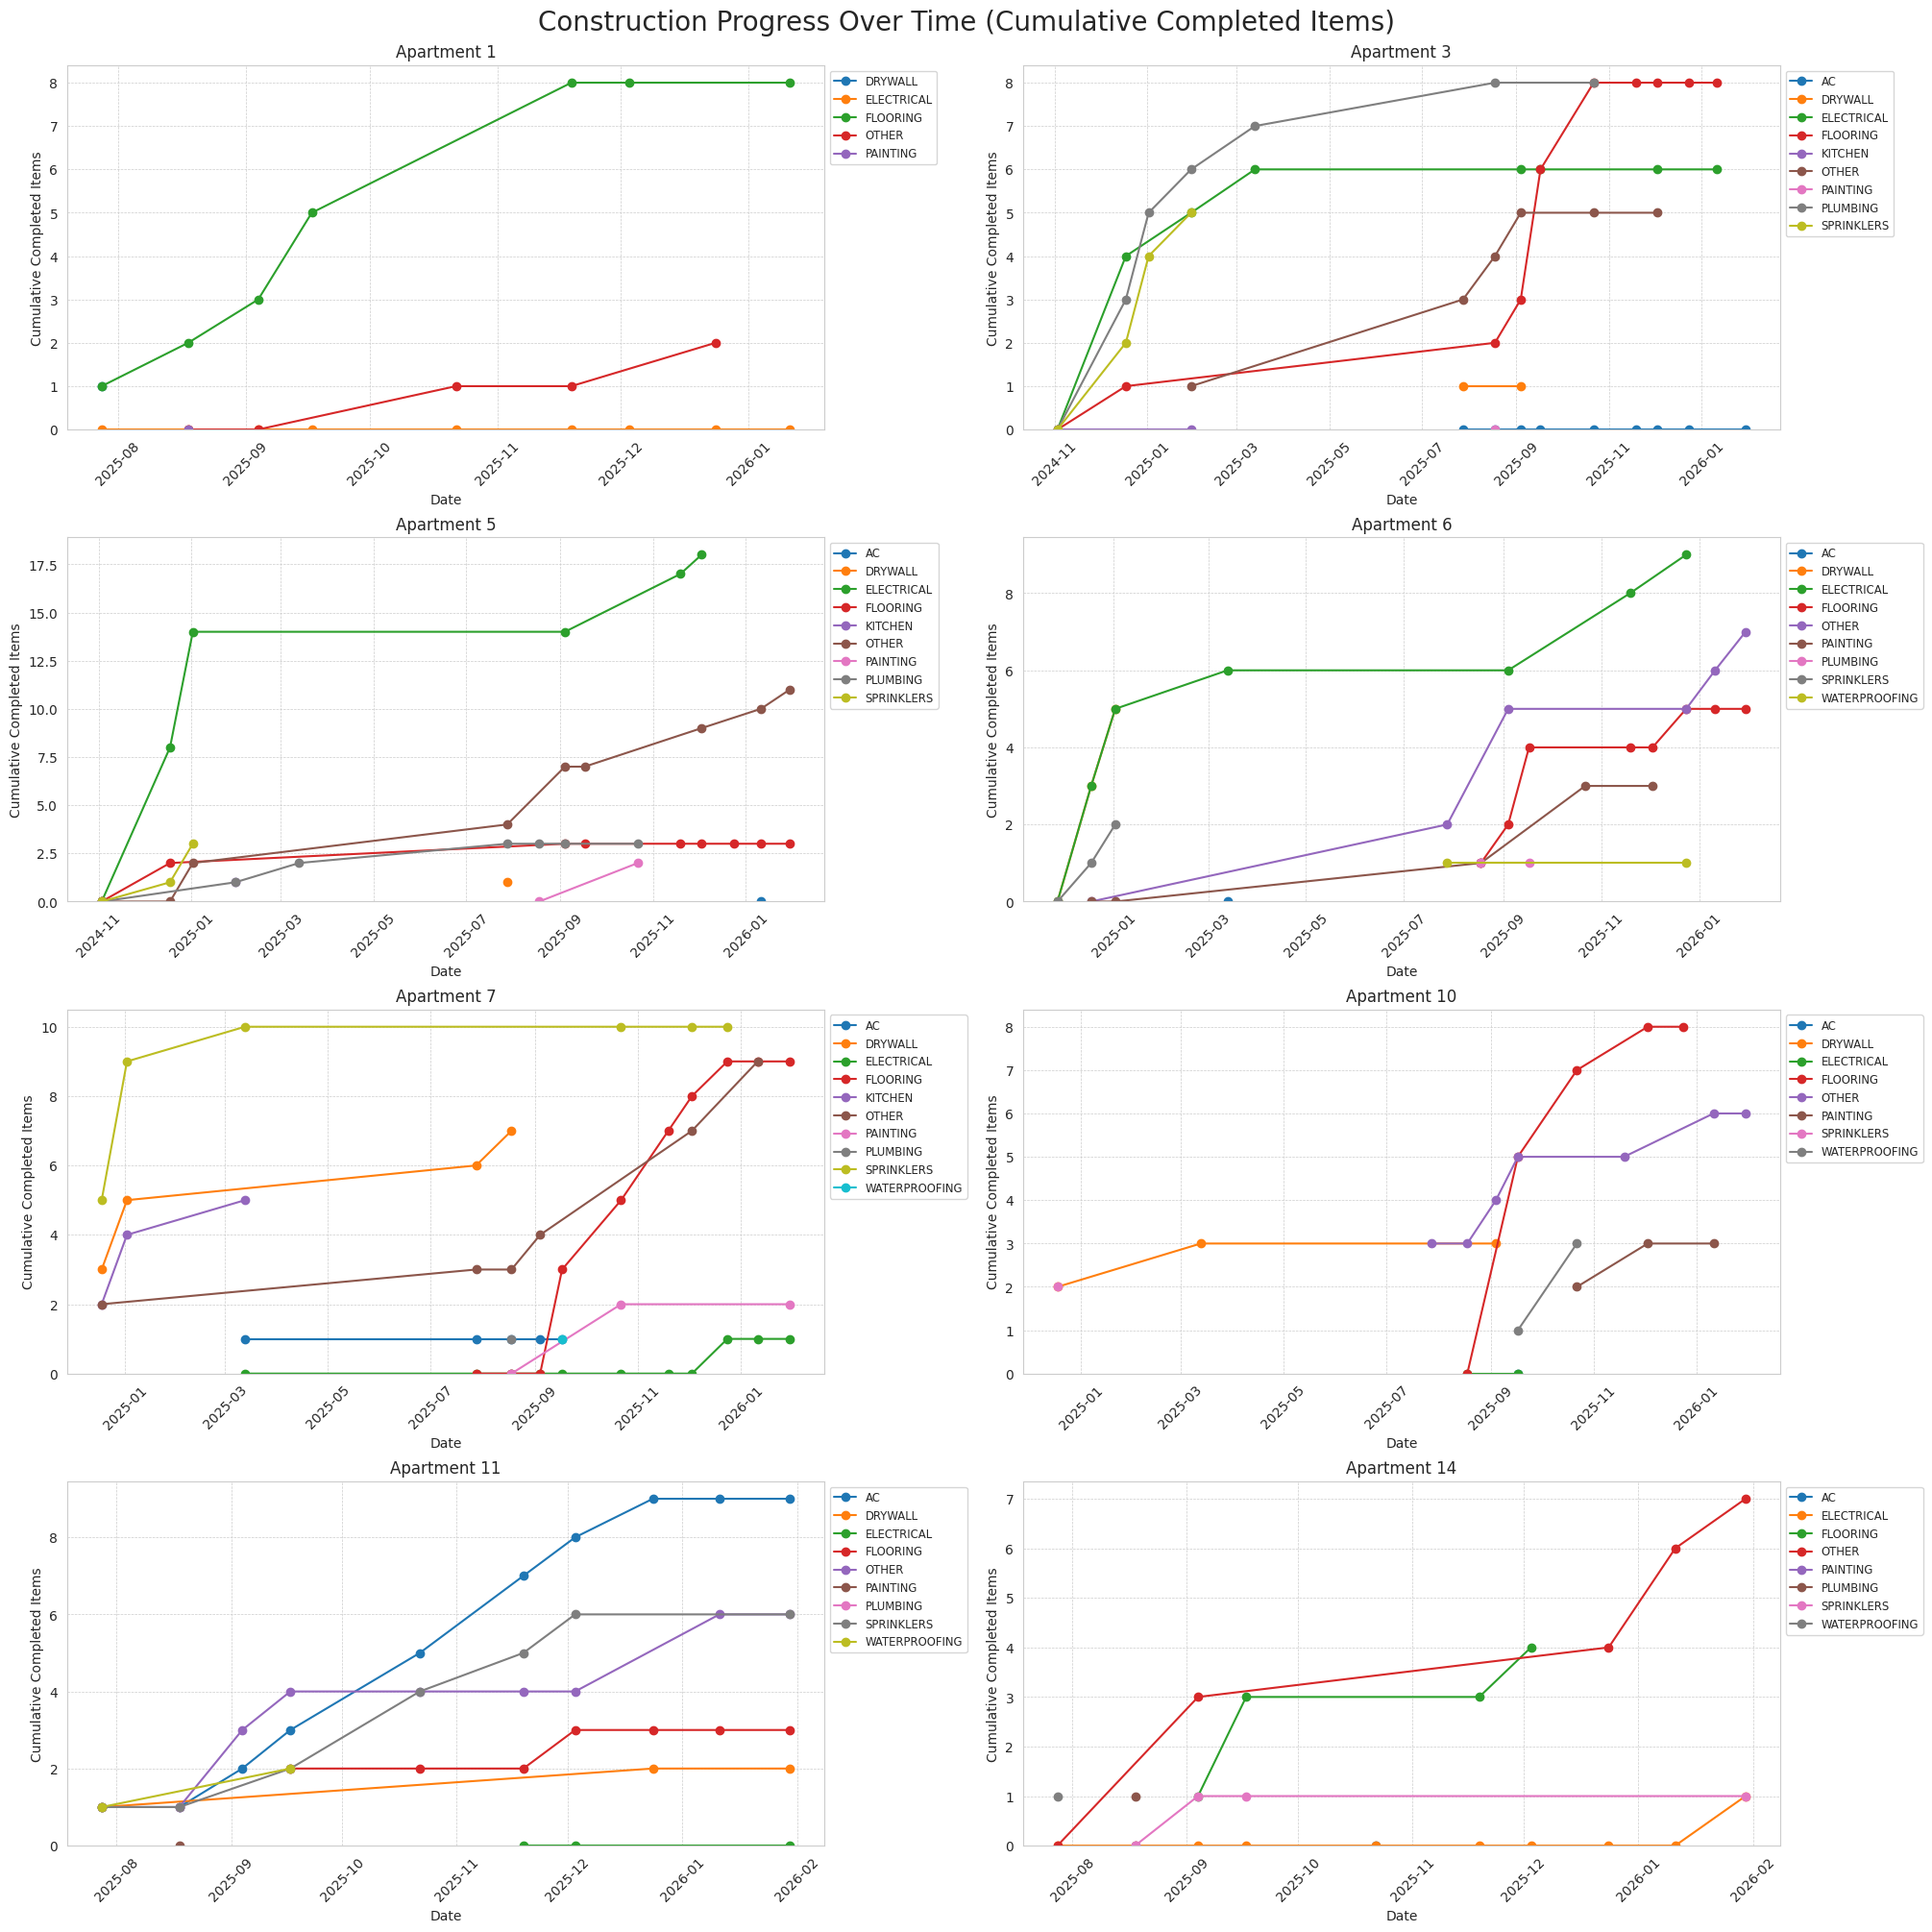

In [14]:
# 3. Visualization
if 'df_grouped' in locals():
    # Get list of apartments
    apartments = sorted(df_grouped['apartment_number'].unique(), key=lambda x: int(x) if x.isdigit() else x)
    
    # Create subplots grid
    n_apts = len(apartments)
    n_cols = 2
    n_rows = (n_apts + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), constrained_layout=True)
    axes = axes.flatten()
    
    for i, apt_num in enumerate(apartments):
        ax = axes[i]
        
        # Filter data for this apartment
        apt_data = df_grouped[df_grouped['apartment_number'] == apt_num]
        
        # Get start date for this apartment (first report)
        start_date = apt_data['reportDate'].min()
        
        # Plot each category
        categories = apt_data['category'].unique()
        
        for cat in categories:
            cat_data = apt_data[apt_data['category'] == cat]
            ax.plot(cat_data['reportDate'], cat_data['cumulative_completed'], marker='o', label=cat)
        
        ax.set_title(f"Apartment {apt_num}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Cumulative Completed Items")
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
        
        # Enforce upward bound visual style (start from 0 or min)
        ax.set_ylim(bottom=0)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
        
    plt.suptitle("Construction Progress Over Time (Cumulative Completed Items)", fontsize=20)
    plt.show()